### NAME: Bùi Phương Thảo
### ID: 11215341
### Class: DSEB 63

##### Exercise 1: Implement k-means algorithm by Numpy.

In [86]:
import numpy as np 
import matplotlib.pyplot as plt

In [87]:
class Kmeans:
    def __init__(self, n_cluster, X, n_iter):
        self.n_cluster = n_cluster
        self.X = X
        self.n_iter = n_iter
    
    def centeroid_initialize(self):
        centeroid =  self.X[np.random.choice(self.X.shape[0], self.n_cluster, replace= False)]
        for i in range(self.n_iter):
            new_center = self.center_update(centeroid)
            if self.convergence_check(centeroid,new_center):
                break
            centeroid = new_center

        self.centeroid = centeroid
        #inertia = np.sum(self.X[self.labels[]])
        return self
    
    def convergence_check(self,center,new_center):
        return np.all(center == new_center)
    
    def center_update(self, centeroid):
        labels = np.zeros(self.X.shape[0])
        for i in range(self.X.shape[0]):
            data_point = self.X[i]
            distance = [self.euclidean(data_point,center) for center in centeroid]
            labels[i] = np.argmin(distance, axis = 0)
        self.labels = labels
        
        for i in range(self.n_cluster):
            all_data_points = self.X[np.array(labels) == i]
            centeroid[i] = np.mean(all_data_points,axis = 0)
        
        return centeroid

    def euclidean(self,data_point,center):
        return np.linalg.norm(data_point - center)

    def get_center(self):
        return self.centeroid
    
    def get_labels(self):
        return self.labels

In [88]:
import pandas as pd

#### Use "Wine dataset" below and choose 2 features according to your preference. Run the k-means algorithm built in the first question

In [89]:
data = pd.read_csv(r"C:\Users\KyThuat88\Downloads\wine-clustering.csv")

In [90]:
data_trial = data[["Alcohol", "Total_Phenols"]]

In [91]:
import seaborn as sns


<Axes: xlabel='Alcohol', ylabel='Total_Phenols'>

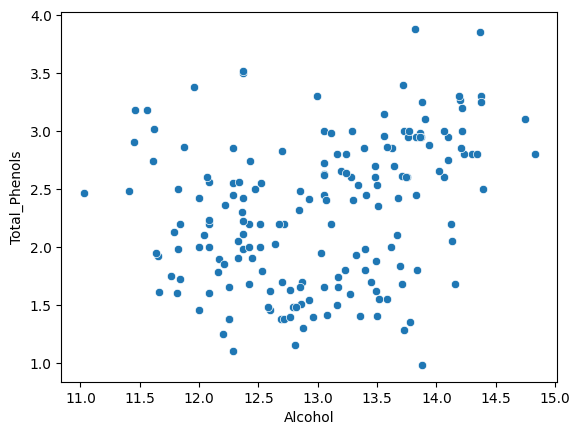

In [92]:
sns.scatterplot(data_trial, x = 'Alcohol', y ='Total_Phenols')

In [93]:
data1 = np.matrix(data_trial)

In [94]:
model = Kmeans(2,data1,10)

In [95]:
model.centeroid_initialize()
muy = model.get_center()
label = model.get_labels()

In [96]:
muy

matrix([[14.08078947,  2.77289474],
        [12.70742857,  2.16542857]])

In [97]:

def visualize1(data, label, center):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for j in range(data.shape[0]):
        # Convert label to integer before using as an index
        cluster_index = int(label[j])
        plt.scatter(data[j, 0], data[j, 1], color=colors[cluster_index])
    # Visualize centroids
    for i in range(len(center)):
        plt.scatter(center[i, 0], center[i, 1], marker='x', s=200, linewidths=3, color='k')



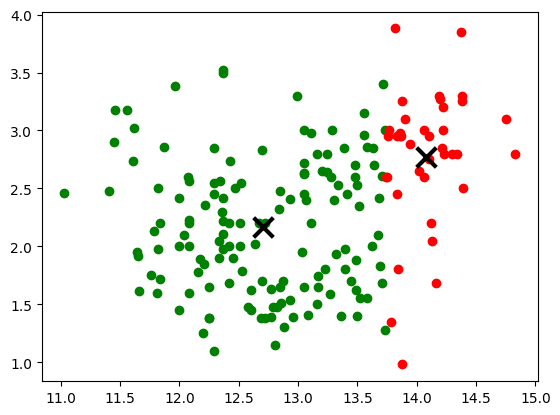

In [98]:
visualize1(data1,label,muy)
#data1[0,0]

In [99]:
k3 = Kmeans(3,data1,10)
k3.centeroid_initialize()
center3 = k3.get_center()
label3 = k3.get_labels()

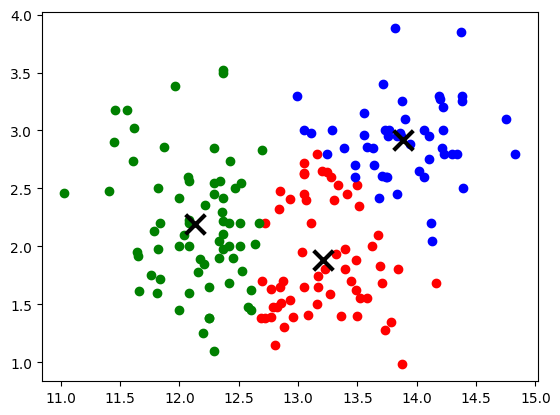

In [100]:
visualize1(data1,label3,center3)

#### Read and understand how to choose the optimal number of cluster (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/). Draw the elbow for the whole "Wine" dataset (all features).

* Outliers: Cluster formation is very sensitive to the presence of outliers. Outliers pull the cluster towards itself, thus affecting optimal cluster formation.
* Distance Measures: Using different distance measures (used to calculate the distance between a data point and cluster center) might yield different clusters.
* The K-Means algorithm does not work with categorical data.
* The process may not converge in the given number of iterations. You should always check for convergence.

In [101]:
from scipy.spatial.distance import cdist

losses = []
K = 10
for i in range(1, K):
    kmeans_i = Kmeans(i,data1,10)
    kmeans_i.centeroid_initialize()
    d2centroids = cdist(data1, kmeans_i.get_center(), 'euclidean')
    min_distance = np.min(d2centroids, axis=1)
    loss = np.sum(min_distance)
    losses.append(loss)

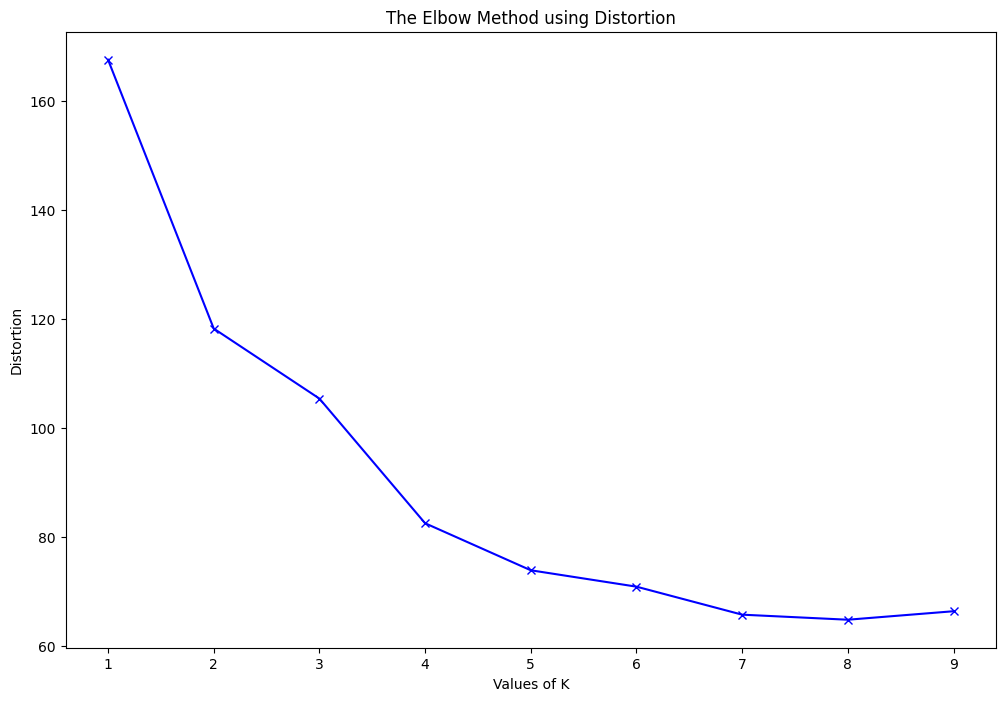

In [102]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, K), losses, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [103]:
from sklearn.decomposition import PCA

In [104]:
data_full = np.asarray(data)

In [108]:
pca = PCA(2)
t = pca.fit_transform(data_full)

In [111]:
pca_ = Kmeans(2,t,10)
pca_.centeroid_initialize()
center4 = pca_.get_center()
label4 = pca_.get_labels()

In [110]:
center4

array([[ 527.42899364,   -2.95058693],
       [-115.60087532,    0.64670398]])

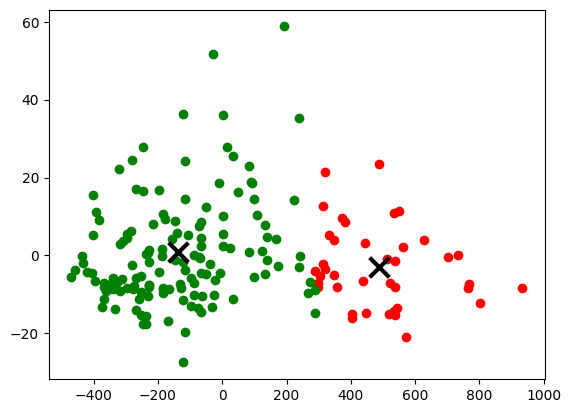

In [112]:
visualize1(t,label4,center4)